# Job outcomes of students who graduated from college between 2010 and 2012


##  Visualizing Earnings Based On College Majors 
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the [dataset](https://github.com/fivethirtyeight/data/tree/master/college-majors):

- Rank - Rank by median earnings **(the dataset is ordered by this column)**.
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample size - (unweighted) of full-time, year-round ONLY (used for earnings)
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total
- Employed - Number employed (ESR == 1 or 2)
- Full_time - Employed 35 hours or more
- Part_time - Employed less than 35 hours
- Full_time_year_round - Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
- Unemployed - Number unemployed (ESR == 3)
- Unemployment_rate - Unemployed / (Unemployed + Employed)
- Median - Median earnings of full-time, year-round workers
- P25th - 25th percentile of earnings
- P75th - 75th percentile of earnings
- College_jobs - Number with job requiring a college degree
- Non_college_jobs - Number with job not requiring a college degree
- Low_wage_jobs - Number in low-wage service jobs

Using visualizations, we can start to explore questions from the dataset like:

>- Do students in more popular majors make more money?
Using scatter plots

>- How many majors are predominantly male? Predominantly female?
Using histograms

>- Which category of majors have the most students?
Using bar plots

Firstly I proceed to prepare and clean the data

# Data Cleaning 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting as pdlt

%matplotlib inline

recent_grads = pd.read_csv("/content/drive/My Drive/Data Analyst In Python/Modulo4: Exploratory Data Visualization/Proyecto Modulo4/recent-grads.csv")

- Dataframe is conformed by 173 rows and 21 columns, of which columns "Total", "Men" and "Women" only has one null value each one.

- Dataframe has nineteen columns with numeric values and two columns with text type values.

In [ ]:
raw_data_count = recent_grads.shape
print("Dataframe dimentions: ",raw_data_count,"\n")
print(recent_grads.info())

Dataframe dimentions:  (173, 21) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    f

In [ ]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [ ]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


**Summary statistics for all of the numeric columns**

About summary statistics for all numeric column can observed some values that could hasn't sense because represent very low salaries equal to cero.

In [ ]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


- About summary statistics for all text columns can observed for "Major" columns that theresn't recurrencies because has only 173 unique values.  In this case the top value don't has sense.

- About "Major_category" there's sixteen unique values, of which top is Engineering category whic frequency equal to 29.

In [ ]:
recent_grads.describe(include=["O"])

,Major,Major_category
count,173,173
unique,173,16
top,ACCOUNTING,Engineering
freq,1,29


**Dropping rows with missing values **(Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors)

New dimentions of the Dataframe are 172 rows and the same 21 columns, Thus columns "Total", "Men" and "Women" shared the same row with null values.

In [ ]:
recent_grads = recent_grads.dropna(axis = 0)
cleaned_data_count = recent_grads.shape
print("Cleaned Dataframe: ",cleaned_data_count)

Cleaned Dataframe:  (172, 21)


**With Dataframe.info() can to inspect that already theresn't null values.**

In [ ]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

## ** Data exploring**

**Scatter plots:**

With each scatter plot can graphically infer that not exist correlation between the variables, and this is supported with each correlation coefficient :

- Sample_size and Median

- Sample_size and Unemployment_rate

- Full_time and Median

- ShareWomen and Unemployment_rate

- Men and Median

- Women and Median


Correlation coefficient:  -0.06447499542762185


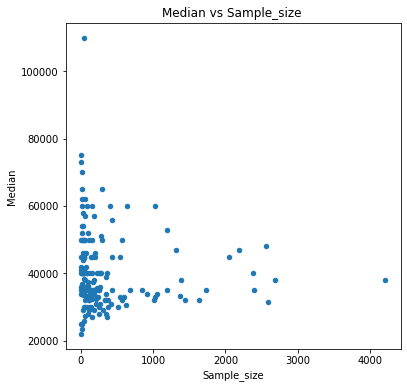

In [ ]:
recent_grads.plot(x='Sample_size', y='Median',title = "Median vs Sample_size ", kind='scatter', figsize=(6,6))
print("Correlation coefficient: ",np.corrcoef(recent_grads["Sample_size"], recent_grads["Median"])[0, 1])

Correlation coefficient:  0.06295493699511233


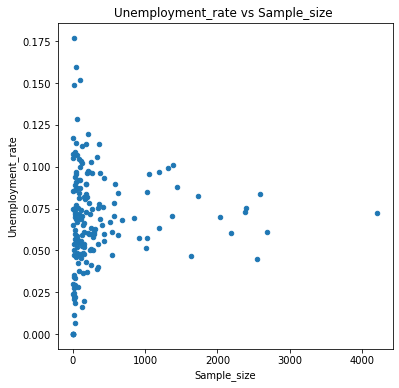

In [ ]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate',title = "Unemployment_rate vs Sample_size ", kind='scatter', figsize=(6,6))
print("Correlation coefficient: ",np.corrcoef(recent_grads["Sample_size"], recent_grads["Unemployment_rate"])[0, 1])

Correlation coefficient:  -0.07903093567520722


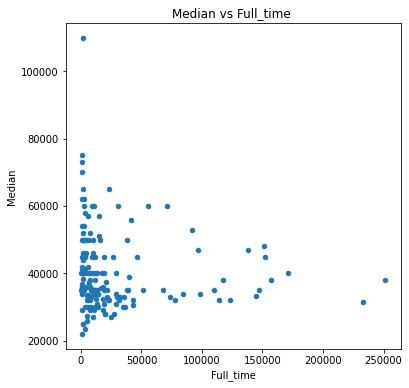

In [ ]:
recent_grads.plot(x='Full_time', y='Median',title = "Median vs Full_time ", kind='scatter', figsize=(6,6))
print("Correlation coefficient: ",np.corrcoef(recent_grads["Full_time"], recent_grads["Median"])[0, 1])

Correlation coefficient:  0.0732045786722932


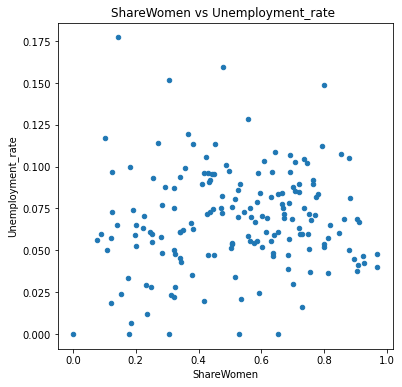

In [ ]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate',title = "ShareWomen vs Unemployment_rate ", kind='scatter', figsize=(6,6))
print("Correlation coefficient: ",np.corrcoef(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])[0, 1])

Correlation coefficient:  0.025990597811967213


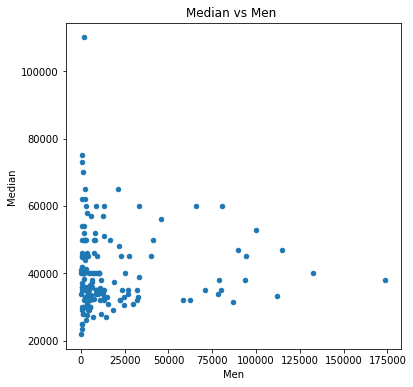

In [ ]:
recent_grads.plot(x='Men', y='Median',title = "Median vs Men ", kind='scatter', figsize=(6,6))
print("Correlation coefficient: ",np.corrcoef(recent_grads["Men"], recent_grads["Median"])[0, 1])

Correlation coefficient:  -0.18284186159966848


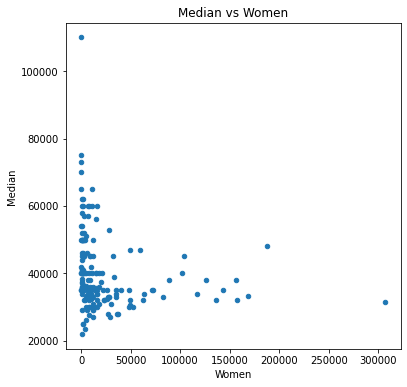

In [ ]:
recent_grads.plot(x='Women', y='Median',title = "Median vs Women", kind='scatter', figsize=(6,6))
print("Correlation coefficient: ",np.corrcoef(recent_grads["Women"], recent_grads["Median"])[0, 1])

Correlation coefficient:  -0.1067376702051372


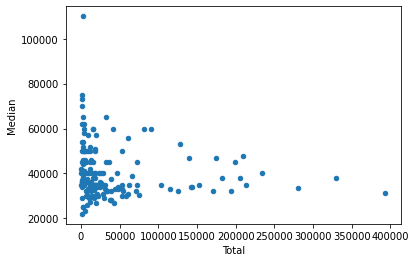

In [ ]:
recent_grads.plot(x='Total', y='Median', kind='scatter')
print("Correlation coefficient: ",np.corrcoef(recent_grads["Total"], recent_grads["Median"])[0, 1])

Correlation coefficient:  -0.1067376702051372


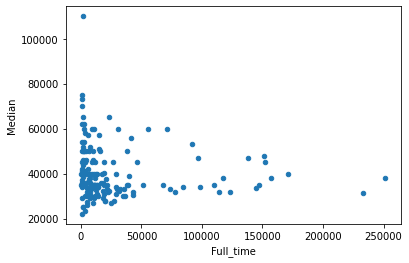

In [ ]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')
print("Correlation coefficient: ",np.corrcoef(recent_grads["Total"], recent_grads["Median"])[0, 1])

- **Do students in more popular majors make more money?**

Dataframe doesn’t have a “popularity” column. This it can approximation using the column "Total" against "Median" (the median salary of full-time, year-round workers). In this case the Mayor's doesn't have correlation with make more money.


- **Do students that majored in subjects that were majority female make more money?**

There is no relation between students female and earning more or less money. This can be verified in the previous scatter plots.

- **Is there any link between the number of full-time employees and median salary?**

There is no relation between the number of full-time employees and median salary. This can be verified in the previous scatter plots.


**Histograms**

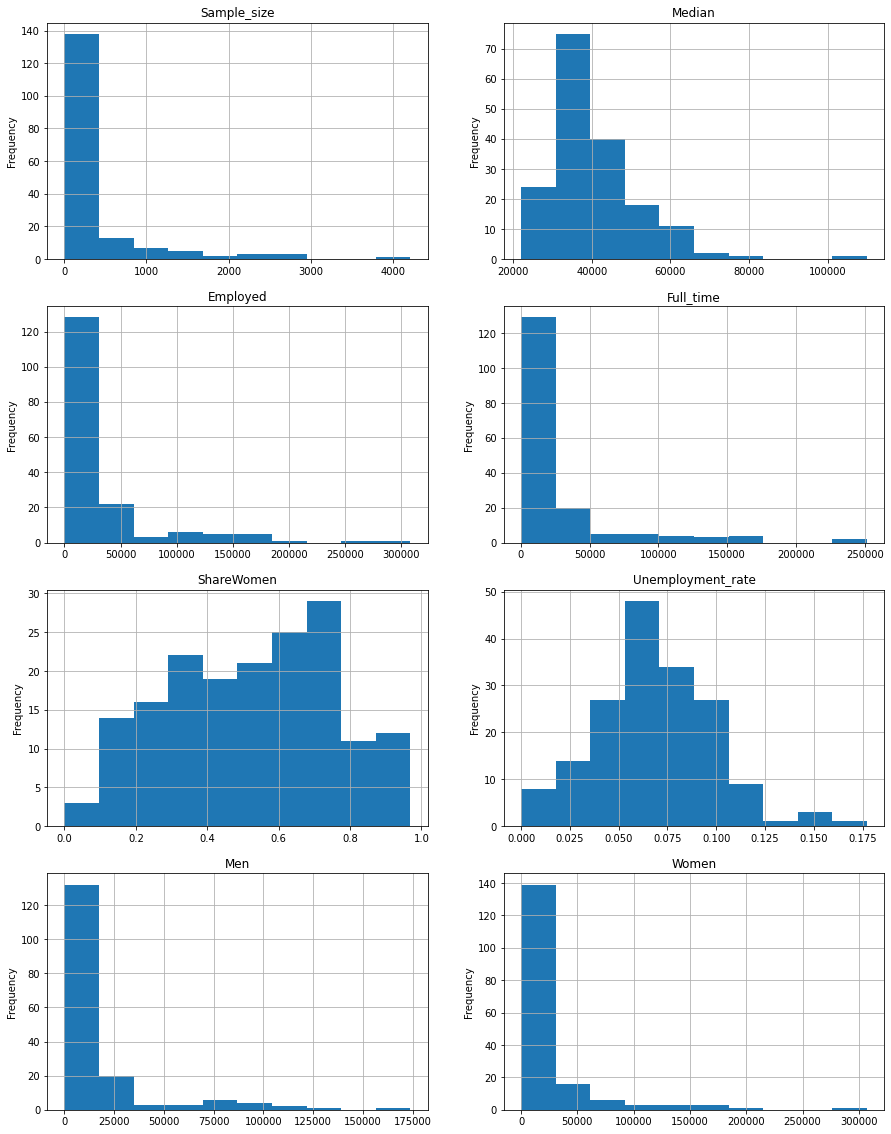

In [ ]:
col = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", 
       "Unemployment_rate", "Men", "Women"]
fig = plt.figure(figsize=(15,20))

for i in range (0,8):
        ax = fig.add_subplot(4,2,i+1)
        ax = recent_grads[col[i]].plot(kind='hist',grid = True,title= col[i])        

- **What percent of majors are predominantly male? Predominantly female?**

Most women are distributed in 14 mayors (Approximately 8% of the majors), ranging from PSYCHOLOGY to CRIMINAL JUSTICE AND FIRE PROTECTION

Most Men are distributed in 15 mayors (Approximately 9% of the majors), ranging from BUSINESS MANAGEMENT AND ADMINISTRATION to ELECTRICAL ENGINEERING

In [ ]:
women = recent_grads[["Women","Major"]].sort_values("Women",ascending = False).copy()
women = pd.DataFrame(women["Women"].values, index = women["Major"],columns = ["Women"])
women["%Acum_Women"] = (women["Women"].cumsum()/women["Women"].sum())*100

men = recent_grads[["Men","Major"]].sort_values("Men",ascending = False).copy()
men = pd.DataFrame(men["Men"].values, index = men["Major"],columns = ["Men"])
men["%Acum_Men"] = (men["Men"].cumsum()/men["Men"].sum())*100

Text(0.5, 1.0, 'Top 20 Majors by Women in Ascending Order')

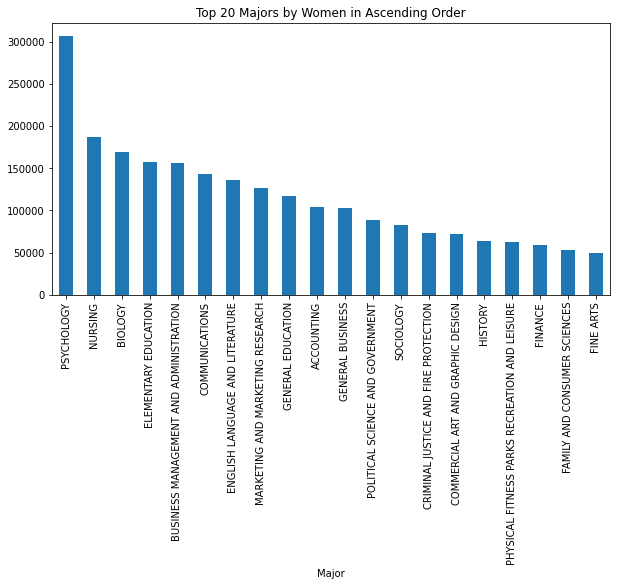

In [ ]:
women["Women"][0:20].plot.bar(figsize=(10,5)).set_title("Top 20 Majors by Women in Ascending Order")

Text(0.5, 1.0, 'Top 20 Majors by Men in Ascending Order')

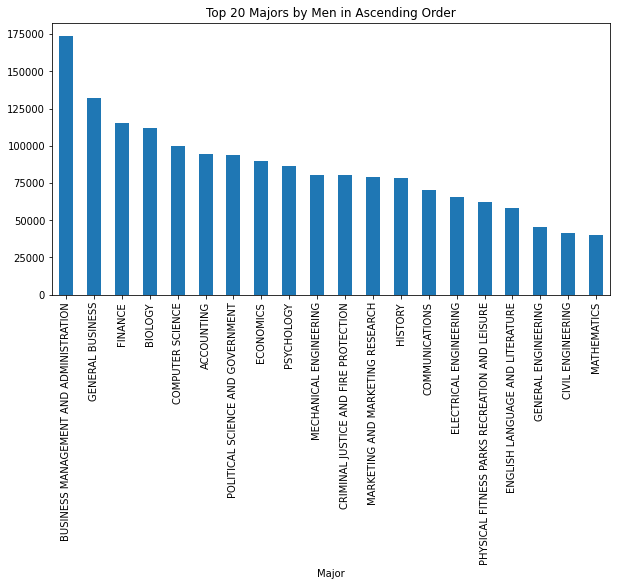

In [ ]:
men["Men"][0:20].plot.bar(figsize=(10,5)).set_title("Top 20 Majors by Men in Ascending Order")

**Frequency for top 20 Mayor by Women and Men**

In [ ]:
women.head(20)

,Women,%Acum_Women
Major,,
PSYCHOLOGY,307087.0,7.883672
NURSING,187621.0,12.700361
BIOLOGY,168947.0,17.037642
ELEMENTARY EDUCATION,157833.0,21.089600
BUSINESS MANAGEMENT AND ADMINISTRATION,156118.0,25.097530
COMMUNICATIONS,143377.0,28.778367
ENGLISH LANGUAGE AND LITERATURE,136446.0,32.281268
MARKETING AND MARKETING RESEARCH,126354.0,35.525084
GENERAL EDUCATION,116825.0,38.524266


In [ ]:
men.head(20)

,Men,%Acum_Men
Major,,
BUSINESS MANAGEMENT AND ADMINISTRATION,173809.0,6.042533
GENERAL BUSINESS,132238.0,10.639836
FINANCE,115030.0,14.638896
BIOLOGY,111762.0,18.524342
COMPUTER SCIENCE,99743.0,21.991944
ACCOUNTING,94519.0,25.277932
POLITICAL SCIENCE AND GOVERNMENT,93880.0,28.541704
ECONOMICS,89749.0,31.661861
PSYCHOLOGY,86648.0,34.674210


**Frequency table for Median histogram**

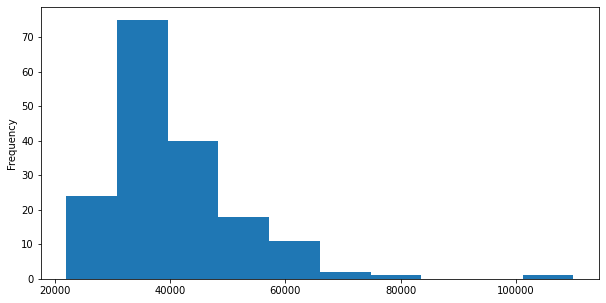

In [ ]:
recent_grads["Median"].plot(kind = "hist",figsize = (10,5))

- **What's the most common median salary range?**

the most common median salary range is 30,800.0 to 39,600.0 dollars

In [ ]:
pd.cut(recent_grads["Median"], bins=10).value_counts()

(30800.0, 39600.0]      75
(39600.0, 48400.0]      40
(21912.0, 30800.0]      24
(48400.0, 57200.0]      18
(57200.0, 66000.0]      11
(66000.0, 74800.0]       2
(101200.0, 110000.0]     1
(74800.0, 83600.0]       1
(92400.0, 101200.0]      0
(83600.0, 92400.0]       0
Name: Median, dtype: int64

**Scatter matrix**

- With each scatter plot can graphically infer that not exist correlation between the variables

- The most commun sample size is between (0 to 423] with a frequency of 138

- The most commun Median is between (30.800 to 39.600] with a frequency of 75

- The most commun Unemployment rate os between (0,0532 to 0.0709] with a frequency of 48

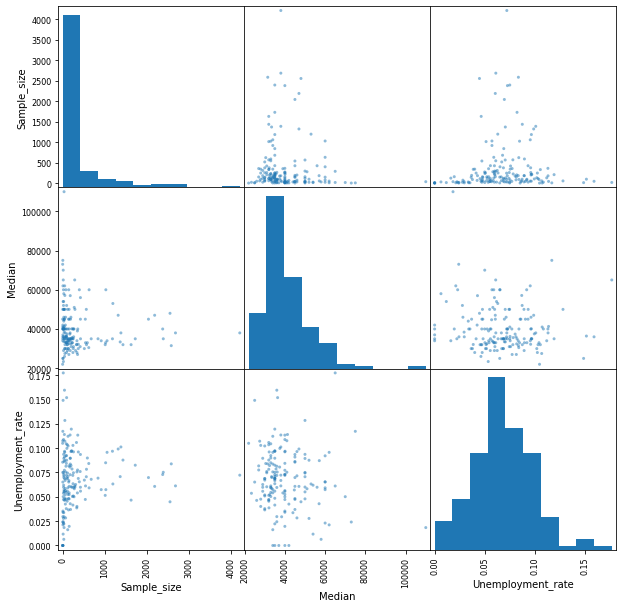

In [ ]:
pdlt.scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))
plt.show()

In [ ]:
pd.cut(recent_grads["Sample_size"],bins = 10).value_counts().head(1)

(-2.21, 423.0]    138
Name: Sample_size, dtype: int64

In [ ]:
pd.cut(recent_grads["Median"],bins = 10).value_counts().head(1)

(30800.0, 39600.0]    75
Name: Median, dtype: int64

In [ ]:
pd.cut(recent_grads["Unemployment_rate"],bins = 10).value_counts().head(1)

(0.0532, 0.0709]    48
Name: Unemployment_rate, dtype: int64

**Top 10 Unemployment rate**

The most Unemployment rate is approximately 18% and corresponds to Nuclear Engineering.

In [ ]:
unemploy = recent_grads[["Major","Unemployment_rate"]].sort_values("Unemployment_rate",ascending = False).copy()
unemploy.set_index("Major",drop=True,inplace=True)

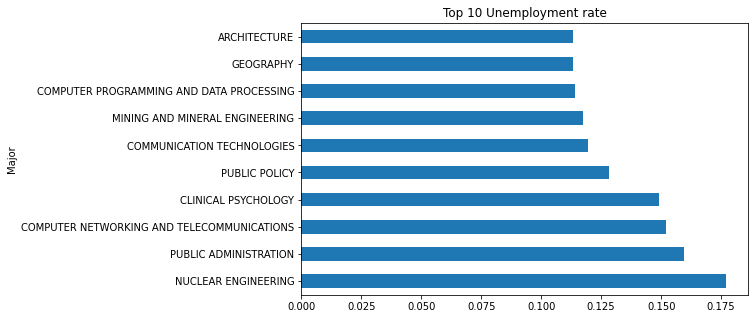

In [ ]:
unemploy[:10]['Unemployment_rate'].plot(kind='barh',figsize = (8,5),title = "Top 10 Unemployment rate")

**Top 10 Majors with most Employed **

The Psychology is the Major with most Employed where there are more Women than Men.

In [ ]:
employ = recent_grads[["Major","Employed"]].sort_values("Employed",ascending = False).copy()
employ.set_index("Major",drop=True,inplace=True)

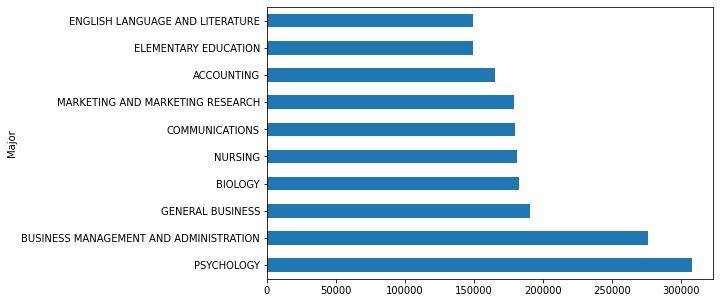

In [ ]:
employ[:10]['Employed'].plot(kind='barh',figsize = (8,5))

**Top and Bottom 5 Majors with Median earnings in orden descent by Genre and Major**

- Chemical engineering is the Major with most Median Earning where predominant the Men.

- Zoology is the Major with least Median Earning where predominant the Women

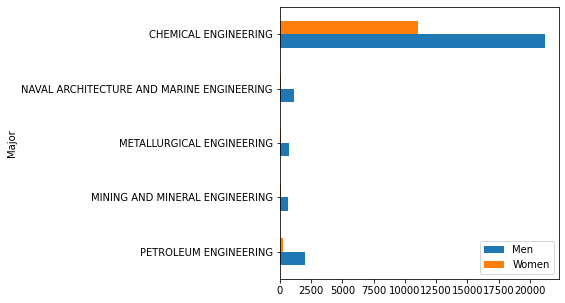

In [ ]:
mw = recent_grads[['Major', 'Men', 'Women']]
mw.head(5).plot.barh(x='Major',figsize = (5,5))

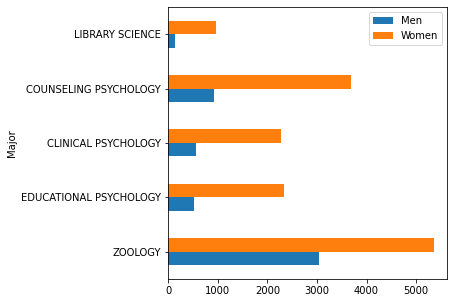

In [ ]:
mw.tail(5).plot.barh(x='Major',figsize = (5,5))

**Top and Bottom 5 Majors with Median earnings in orden descent by Employee and Unemployment**

In general the number of Unemployed is too less respect number of Employed.


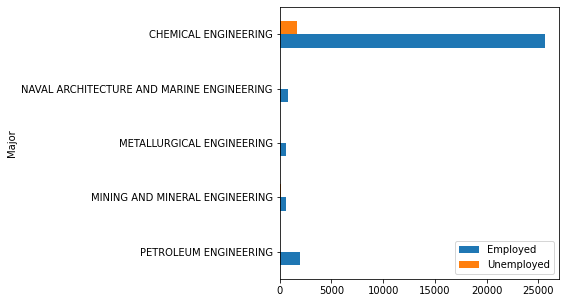

In [ ]:
eu = recent_grads[['Major', 'Employed', 'Unemployed']]
eu.head(5).plot.barh(x='Major',figsize = (5,5))

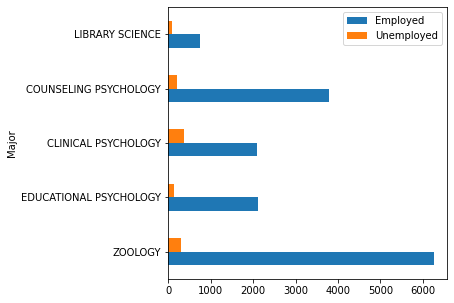

In [ ]:
eu.tail(5).plot.barh(x='Major',figsize = (5,5))